# Aerobic metabolic model

Import the necessary libraries

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from skcycling.data_management import Rider

from skcycling.metrics import aerobic_meta_model

from skcycling.utils.fit import log_linear_model
from skcycling.utils.fit import linear_model

from datetime import date

### Load the data

In [11]:
filename = '../../data/rider/user_1.p'
my_rider = Rider.load_from_pickles(filename)

### Compute the aerobic metabolic model

In [12]:
# Define the starting and ending date from which
# we want to compute the record power-profile
start_date = date(2014,1,1)
end_date = date(2014, 12, 31)

# Compute the record power-profile
my_rider.compute_record_pp((start_date, end_date))

# Compute the amm
pma, t_pma, aei, fit_info_pma_fitting, fit_info_aei_fitting = aerobic_meta_model(my_rider.record_pp_)

print 'MAP : {}, time at MAP : {}, aei : {}'.format(pma, t_pma, aei)
print 'Fitting information about the MAP: {}'.format(fit_info_pma_fitting)
print 'Fitting information about the AEI: {}'.format(fit_info_aei_fitting)

MAP : 331.18038411, time at MAP : 6.5, aei : -11.6518200551
Fitting information about the MAP: {'slope': -37.288350949428853, 'std_err': 5.3147936201520993, 'intercept': 394.39159726158232, 'coeff_det': 0.98591098868064131}
Fitting information about the AEI: {'slope': -11.651820055135625, 'std_err': 1.5164032455937826, 'intercept': 120.85878627101613, 'coeff_det': 0.9913784742201307}


### Plot the information related to the MAP determination using Pinot et al. approach

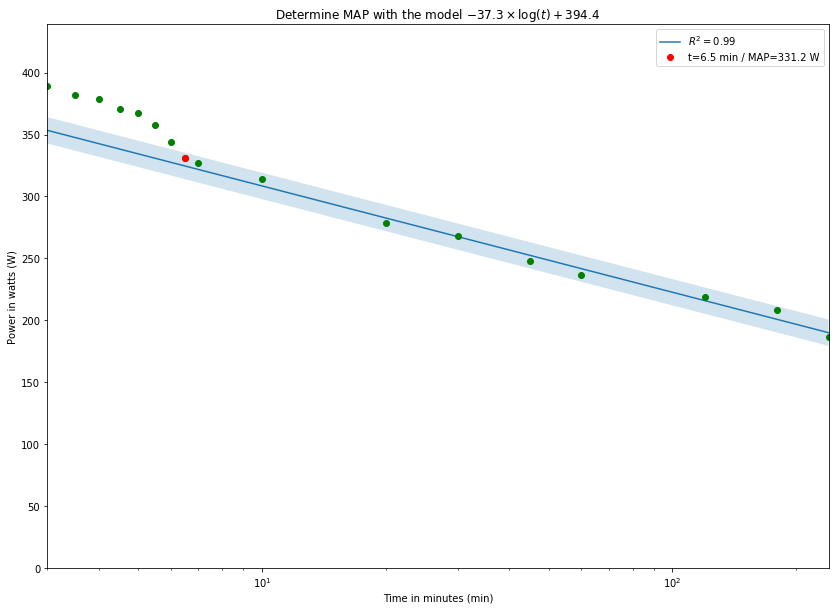

In [13]:
# Plot the normalized power
plt.figure(figsize=(14, 10))
# Define the time samples to use for the plotting
t = np.array([3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10, 20, 30, 45, 60, 120, 180, 240])
# Plot the log linear model found
plt.semilogx(t, log_linear_model(t, fit_info_pma_fitting['slope'], fit_info_pma_fitting['intercept']),
            label=r'$R^2={0:.2f}$'.format(fit_info_aei_fitting['coeff_det']))
# Plot the confidence
plt.fill_between(t,
                 log_linear_model(t, fit_info_pma_fitting['slope'],
                                  fit_info_pma_fitting['intercept']) + 2 * fit_info_pma_fitting['std_err'],
                 log_linear_model(t, fit_info_pma_fitting['slope'],
                                  fit_info_pma_fitting['intercept']) - 2 * fit_info_pma_fitting['std_err'],
                 alpha=0.2)
# Plot the real data point
plt.semilogx(t, my_rider.record_pp_.resampling_rpp(t), 'go')
# Plot the MAP point 
plt.semilogx(t_pma, pma, 'ro', label='t={0:.1f} min / MAP={1:.1f} W'.format(t_pma, pma))
# Plot the legend
plt.xlabel('Time in minutes (min)')
plt.ylabel('Power in watts (W)')
plt.xlim(min(t), max(t))
plt.ylim(0, max(my_rider.record_pp_.resampling_rpp(t)+50))
plt.title(r'Determine MAP with the model ${0:.1f} \times \log(t) + {1:.1f}$'.format(fit_info_pma_fitting['slope'],
                                                                                    fit_info_pma_fitting['intercept']))
plt.legend()
plt.show()

### Plot the information related to the AEI determination using Pinot et al. approach

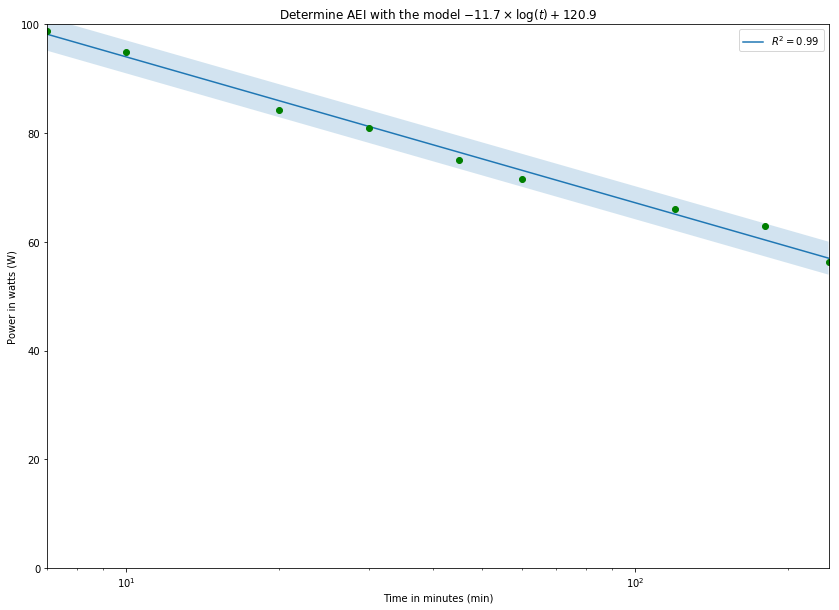

In [14]:
# Plot the normalized power
plt.figure(figsize=(14, 10))
# Define the time samples to use for the plotting
t = np.array([3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10, 20, 30, 45, 60, 120, 180, 240])
t = t[np.nonzero(t > t_pma)]
# Plot the log linear model found
plt.semilogx(t, log_linear_model(t, fit_info_aei_fitting['slope'], fit_info_aei_fitting['intercept']),
             label=r'$R^2={0:.2f}$'.format(fit_info_aei_fitting['coeff_det']))
# Plot the confidence
plt.fill_between(t,
                 log_linear_model(t, fit_info_aei_fitting['slope'],
                                  fit_info_aei_fitting['intercept']) + 2 * fit_info_aei_fitting['std_err'],
                 log_linear_model(t, fit_info_aei_fitting['slope'],
                                  fit_info_aei_fitting['intercept']) - 2 * fit_info_aei_fitting['std_err'],
                 alpha=0.2)
# Plot the real data point
plt.semilogx(t, my_rider.record_pp_.resampling_rpp(t) / pma * 100., 'go')
# Plot the legend
plt.xlabel('Time in minutes (min)')
plt.ylabel('Power in watts (W)')
plt.xlim(min(t), max(t))
plt.ylim(0, 100)
plt.title(r'Determine AEI with the model ${0:.1f} \times \log(t) + {1:.1f}$'.format(fit_info_aei_fitting['slope'],
                                                                                    fit_info_aei_fitting['intercept']))
plt.legend()
plt.show()